# **Business Understanding**

**Objective** <br>
The primary objective of this project is to develop a robust machine learning model capable of accurately detecting fraudulent financial transactions. By leveraging realistic synthetic transaction data, the goal is to build a model that distinguishes between legitimate and fraudulent transactions. This will enable companies to proactively mitigate financial losses, reduce fraud-related risks, and enhance customer trust.

Can we accurately detect fraudulent transactions with lowest minimum amount of error?


# **Data Understanding**

**Describe Data**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/Users/yeohmantik/Documents/Data Science/DS Assignment/synthetic_fraud_dataset.csv')

Initial Data Inspection

View first 5 rows

In [3]:
print(df.head())

  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                   

In [ ]:
df.head(5)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


View the dimension of our dataset (50000 rows and 21 columns)

In [ ]:
print("Shape:", df.shape)

Shape: (50000, 21)


View the dataset info such as data type, and non-null counts

**Object type** <br>
"Transaction_ID", "User_ID", "Transaction_Type", "Timestamp", "Device_Type", "Location", "Merchant_Category", "Card_Type", "Authentication Method"

**Float type** <br>
"Transaction_Amount", "Account_Balance", "Avg_Transaction_Amount_7d", "Transaction_Distance", "Risk_Score"

**Integer type** <br>
"IP_Address_Flag", "Previous_Fraudulent_Activity", "Daily_Transaction_Count"

**Categorical** <br>
Nominal values: "Transaction_Type", "Location", "Device_Type", "Merchant_Category", "Card_Type", "Authentication Method"

**Numerical/Continuous** <br>
"Transaction_Amount", "Account_Balance", "Daily_Transaction_Count", "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Card_Age", "Transaction_Distance", "Risk_Score"

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

Summary statistics for numerical columns

In [ ]:
print(df.describe())

       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.21836   
min              0.000000       500.480000          0.00000   
25%             28.677500     25355.995000          0.00000   
50%             69.660000     50384.430000          0.00000   
75%            138.852500     75115.135000          0.00000   
max           1174.140000     99998.310000          1.00000   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  50000.000000             50000.000000   
mean                       0.098400                 7.485240   
std                        0.297858                 4.039637   
min                        0.000000                 1.000000   
25%                        0.000000                 4.000000   
50%                        0.000000             

Summary for categorical columns

In [ ]:
print(df.describe(include='object'))

       Transaction_ID    User_ID Transaction_Type            Timestamp  \
count           50000      50000            50000                50000   
unique          50000       8963                4                47724   
top         TXN_33553  USER_6599              POS  2023-06-04 06:35:00   
freq                1         16            12549                    4   

       Device_Type Location Merchant_Category   Card_Type  \
count        50000    50000             50000       50000   
unique           3        5                 5           4   
top         Tablet    Tokyo          Clothing  Mastercard   
freq         16779    10208             10033       12693   

       Authentication_Method  
count                  50000  
unique                     4  
top                Biometric  
freq                   12591  


**Check for missing values** <br>
No missing values in this dataset

In [ ]:
print(df.isnull().sum())

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


**Target Variable Distribution** <br>
There are more non-fraud (0) data identified compared to fraud (1) transactions.


In [ ]:
fraud_counts = df['Fraud_Label'].value_counts()

print(fraud_counts)

fraud_percentage = df['Fraud_Label'].value_counts(normalize=True) * 100
print(fraud_percentage)

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64
Fraud_Label
0    67.866
1    32.134
Name: proportion, dtype: float64


Plot a graph to visualize the comparison of non-fraud and fraud

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64


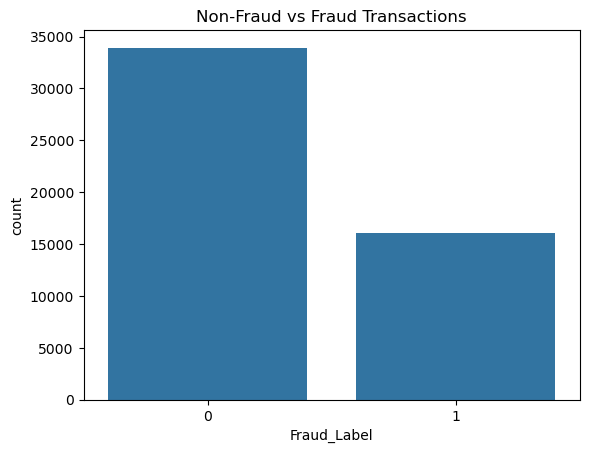

In [ ]:
print(df['Fraud_Label'].value_counts())

sns.countplot(x='Fraud_Label', data=df)
plt.title('Non-Fraud vs Fraud Transactions')
plt.show()

Check for duplicates
has no duplication case in this dataset

Distribution of Account_Balance, as we can see we can determine the distribution by using the mean (average) of it.

In [ ]:
mean = df['Account_Balance'].mean()
std = df['Account_Balance'].std()

df['Z_Score'] = (df['Account_Balance'] - mean) / std

def z_score_label(z):
    if z < -1:
        return 'Low'
    elif z > 1:
        return 'High'
    else:
        return 'Normal'

df['Balance_Label'] = df['Z_Score'].apply(z_score_label)


print(df['Balance_Label'].value_counts())
print("\n")
print(df['Balance_Label'].value_counts(normalize=True) * 100)

mean = df['Account_Balance'].mean()
std = df['Account_Balance'].std()

low_threshold = mean - std
high_threshold = mean + std

print("\n")
print("Thresholds using Z-score:")
print(f"Low: < {low_threshold}")
print(f"Normal: {low_threshold} to {high_threshold}")
print(f"High: > {high_threshold}")

Balance_Label
Normal    28834
High      10595
Low       10571
Name: count, dtype: int64


Balance_Label
Normal    57.668
High      21.190
Low       21.142
Name: proportion, dtype: float64


Thresholds using Z-score:
Low: < 21533.60742354826
Normal: 21533.60742354826 to 79054.52453805174
High: > 79054.52453805174


We can determine that criteria for low balance is below 21533, criteria for normal balance is between 21533 and 79054 and criteria for high balance is above 79054.

The distribution for respective balance category is 57.67 (normal), 21.19 (high) and 21.14 (low)

Check for number of duplicated user ID

In [ ]:
duplicate_count = df['User_ID'].duplicated().sum()
print(f"Number of duplicated User_IDs: {duplicate_count}")

Number of duplicated User_IDs: 41037


In [ ]:
duplicates_df = df[df['User_ID'].duplicated(keep=False)].sort_values('User_ID')

duplicates_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Balance_Label,Z_Score
21475,TXN_13680,USER_1000,383.60,Bank Transfer,2023-10-29 03:47:00,53558.88,Laptop,Mumbai,Clothing,0,...,1,Amex,3,567.59,OTP,0.1279,0,0,Normal,0.113517
13089,TXN_40117,USER_1000,64.78,Online,2023-09-01 20:09:00,25291.69,Tablet,London,Clothing,0,...,2,Discover,133,2042.18,Password,0.9632,1,1,Normal,-0.869332
47834,TXN_36059,USER_1000,69.02,Online,2023-02-21 10:25:00,36077.57,Tablet,London,Groceries,0,...,4,Amex,170,2983.85,Password,0.5529,0,1,Normal,-0.494307
28102,TXN_28650,USER_1000,191.87,Online,2023-04-26 23:17:00,4201.83,Laptop,Tokyo,Electronics,0,...,2,Discover,14,3616.72,OTP,0.1897,0,0,Low,-1.602625
41209,TXN_21630,USER_1000,39.41,Bank Transfer,2023-12-03 06:43:00,70995.83,Laptop,Mumbai,Clothing,0,...,1,Visa,73,4851.37,PIN,0.6365,1,0,Normal,0.719800


Check for negative transaction amount (anomaly) <br>
None has been found in this dataset

In [9]:
negative_amt = df[df['Transaction_Amount'] < 0]
print(f"Negative Transaction Amounts: {len(negative_amt)}")

Negative Transaction Amounts: 0


# **Data Sengmentation**

*Types of transaction*

In [35]:
unique_transaction_types = df['Transaction_Type'].unique()
print("Transaction Types:", unique_transaction_types)

Transaction Types: ['POS' 'Bank Transfer' 'Online' 'ATM Withdrawal']


There are 5 types of transactions in this dataset

In [36]:
transaction_counts = df['Transaction_Type'].value_counts()
print(transaction_counts)

Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64


Each transaction types are almost equal to each other.
<br>
*Which transaction type vs Fraud Label are higher?*

Different types of transactions vs Fraud Label

In [37]:
relation = pd.crosstab(df['Transaction_Type'], df['Fraud_Label'])
print(relation)

Fraud_Label          0     1
Transaction_Type            
ATM Withdrawal    8407  4046
Bank Transfer     8457  3995
Online            8515  4031
POS               8554  3995


In [38]:
fraud_rate = pd.crosstab(df['Transaction_Type'], df['Fraud_Label'], normalize='index') * 100
print(fraud_rate)

Fraud_Label               0          1
Transaction_Type                      
ATM Withdrawal    67.509837  32.490163
Bank Transfer     67.916801  32.083199
Online            67.870238  32.129762
POS               68.164794  31.835206


ATM, Bank Transfer and Online have more fraud label assigned as true. However, they all had similar results.

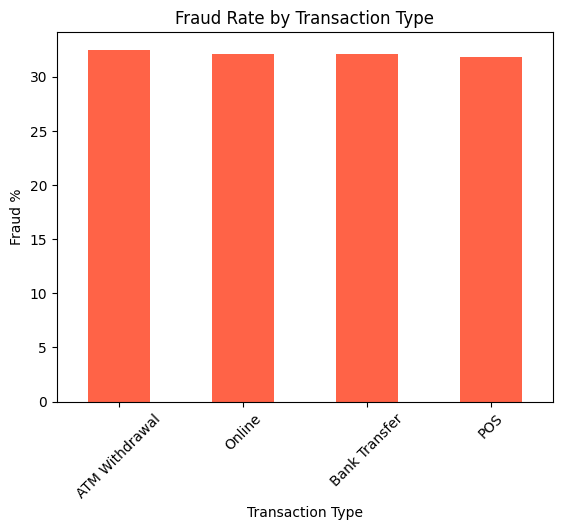

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot fraud rate by transaction type
fraud_rate[1].sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud %')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()


*Risk Score vs Fraud Label*

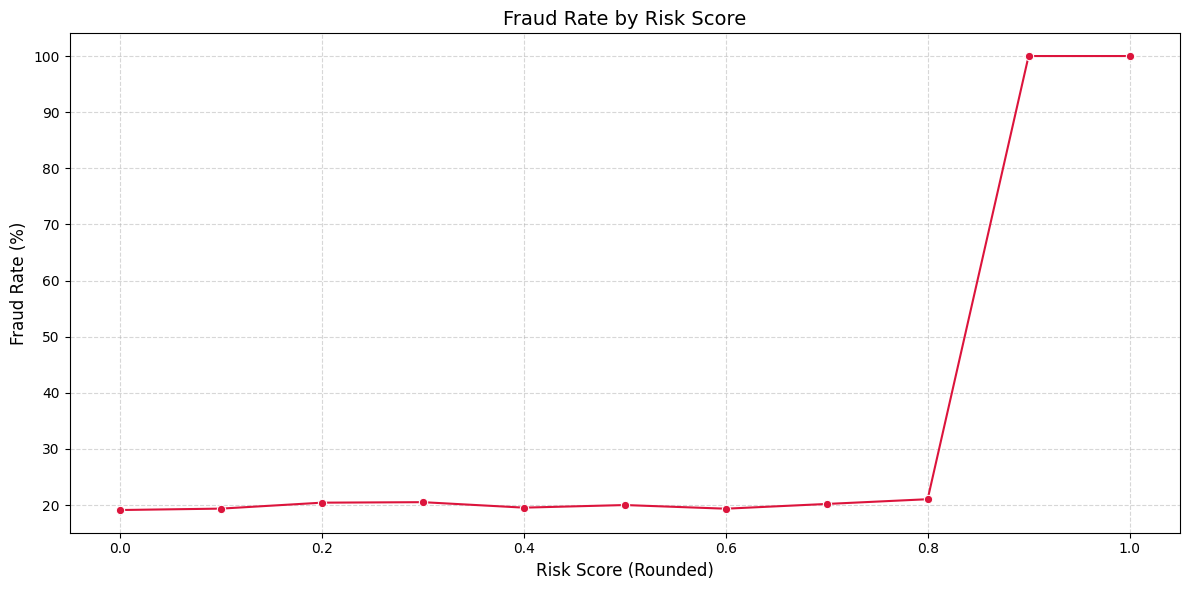

In [40]:
# Step 1: Round Risk_Score for cleaner grouping
df['Risk_Score_Bin'] = df['Risk_Score'].round(1)

# Step 2: Group and calculate fraud rate
risk_vs_fraud = df.groupby('Risk_Score_Bin')['Fraud_Label'].value_counts().unstack().fillna(0)
risk_vs_fraud.columns = ['Non-Fraud', 'Fraud']
risk_vs_fraud['Fraud_Rate_%'] = (risk_vs_fraud['Fraud'] / (risk_vs_fraud['Fraud'] + risk_vs_fraud['Non-Fraud'])) * 100
risk_vs_fraud = risk_vs_fraud.reset_index()

# Step 3: Sort by Risk Score
risk_vs_fraud = risk_vs_fraud.sort_values('Risk_Score_Bin')

# Step 4: Plot with Seaborn for better style
plt.figure(figsize=(12, 6))
sns.lineplot(data=risk_vs_fraud, x='Risk_Score_Bin', y='Fraud_Rate_%', marker='o', color='crimson')

plt.title('Fraud Rate by Risk Score', fontsize=14)
plt.xlabel('Risk Score (Rounded)', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

As visualized from the graph, the higher the risk score, the higher the fraud rate.
<br>
Fraud rate determines the likelihood of fraud label is (1 [Fraud])

*Risk Score vs IP Flag*

   Risk_Score_Bin  IP_Flag_0  IP_Flag_1  Flagged_IP_%
0             0.0       2285        138      5.695419
1             0.1       4724        235      4.738859
2             0.2       4664        243      4.952109
3             0.3       4740        263      5.256846
4             0.4       4833        256      5.030458
5             0.5       4797        264      5.216360
6             0.6       4792        248      4.920635
7             0.7       4771        266      5.280921
8             0.8       4660        232      4.742437
9             0.9       4802        258      5.098814


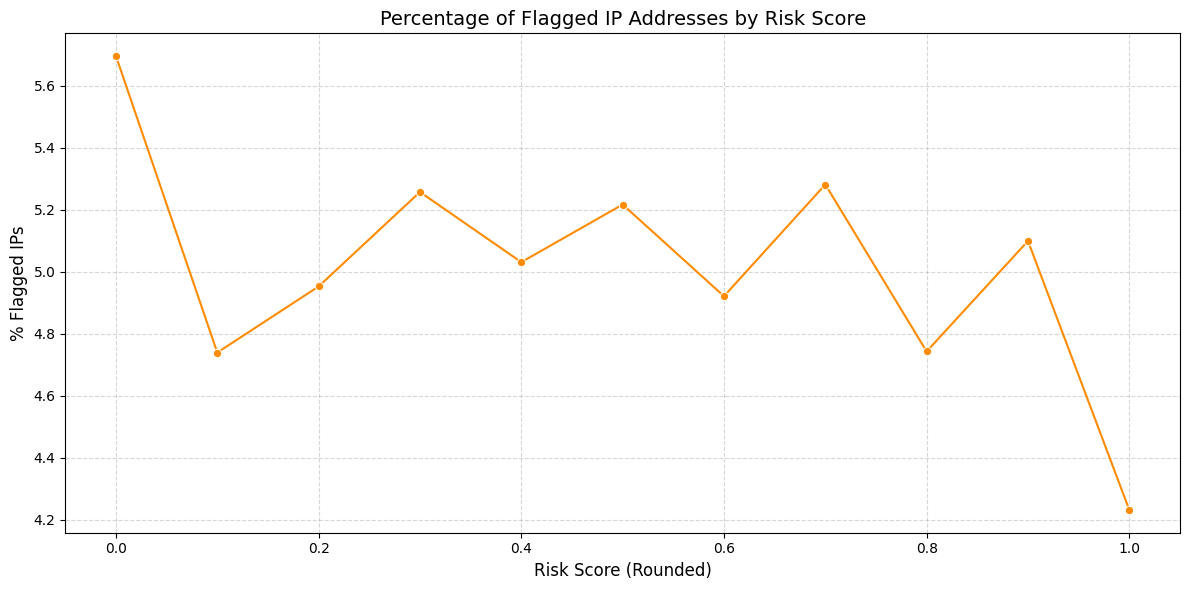

In [33]:
df['Risk_Score_Bin'] = df['Risk_Score'].round(1)

risk_vs_ip = df.groupby('Risk_Score_Bin')['IP_Address_Flag'].value_counts().unstack().fillna(0)
risk_vs_ip.columns = ['IP_Flag_0', 'IP_Flag_1'] 
risk_vs_ip['Flagged_IP_%'] = (risk_vs_ip['IP_Flag_1'] / (risk_vs_ip['IP_Flag_1'] + risk_vs_ip['IP_Flag_0'])) * 100
risk_vs_ip = risk_vs_ip.reset_index()
print(risk_vs_ip.head(10))  # or risk_vs_ip.tail() for the end

plt.figure(figsize=(12, 6))
sns.lineplot(data=risk_vs_ip, x='Risk_Score_Bin', y='Flagged_IP_%', marker='o', color='darkorange')

plt.title('Percentage of Flagged IP Addresses by Risk Score', fontsize=14)

plt.xlabel('Risk Score (Rounded)', fontsize=12)
plt.ylabel('% Flagged IPs', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The visual graph indicates a donwards of IP flag when risk score increases. This finding shows that risk score and IP flag do not have a relationship.

*IP Flag vs Fraud Label*

/var/folders/1_/1_b7nm8j79z7v6mrgtdfpg5c0000gn/T/ipykernel_90474/3788392621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ip_vs_fraud, x='IP_Address_Flag', y='Fraud_Rate_%', palette='Set2')


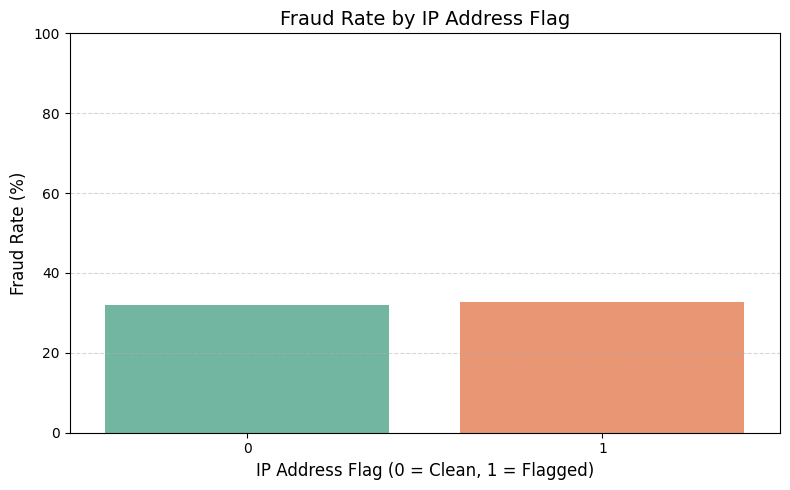

In [34]:
ip_vs_fraud = df.groupby('IP_Address_Flag')['Fraud_Label'].value_counts().unstack().fillna(0)
ip_vs_fraud.columns = ['Non-Fraud', 'Fraud']
ip_vs_fraud['Total'] = ip_vs_fraud['Non-Fraud'] + ip_vs_fraud['Fraud']
ip_vs_fraud['Fraud_Rate_%'] = (ip_vs_fraud['Fraud'] / ip_vs_fraud['Total']) * 100
ip_vs_fraud = ip_vs_fraud.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=ip_vs_fraud, x='IP_Address_Flag', y='Fraud_Rate_%', palette='Set2')

plt.title('Fraud Rate by IP Address Flag', fontsize=14)
plt.xlabel('IP Address Flag (0 = Clean, 1 = Flagged)', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*How many groups of transaction (Low, Med, High)*


In [46]:
# Define custom function
def custom_transaction_group(amount):
    if amount <= 100:
        return 'Low'
    elif amount <= 500:
        return 'Medium'
    else:
        return 'High'

# Apply function to create new column
df['Transaction_Group'] = df['Transaction_Amount'].apply(custom_transaction_group)

# Count each group
group_counts = df['Transaction_Group'].value_counts()

# Calculate percentage
group_percentages = (group_counts / len(df)) * 100

# Combine into a nice DataFrame
group_summary = pd.DataFrame({
    'Count': group_counts,
    'Percentage (%)': group_percentages.round(2)
})

print(group_summary)

                   Count  Percentage (%)
Transaction_Group                       
Low                31535           63.07
Medium             18170           36.34
High                 295            0.59


Transaction amount below 100 is considered as low, 100 to 500 is medium and high is 500 and above.
<br><br>
From the result, we can tell that most transaction amount belongs to the low group and high group has the least percentage

*Transaction_Avg_7d vs Fraud Label*

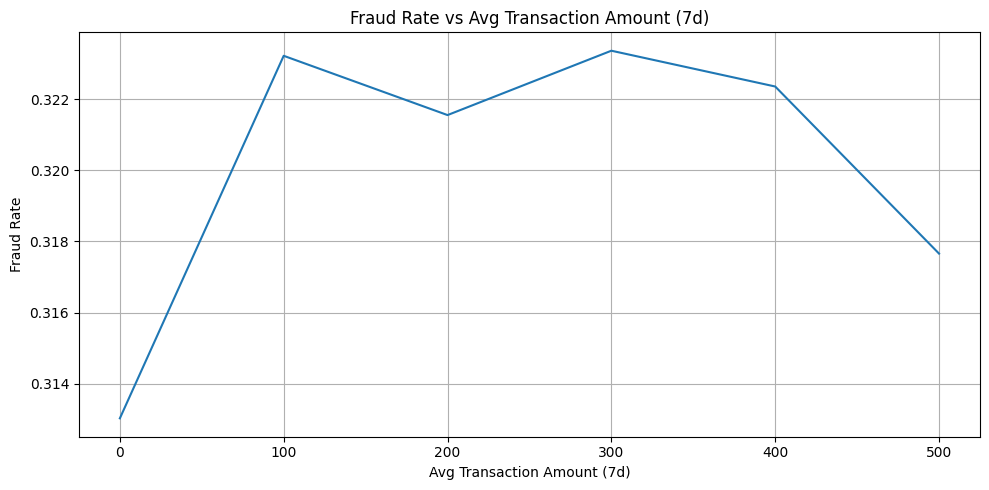

In [12]:
df['Avg_Trans_7d_Group'] = df['Avg_Transaction_Amount_7d'].apply(categorize_avg_transaction)
fraud_rate_avg_7d = df.groupby('Avg_Trans_7d_Group')['Fraud_Label'].value_counts(normalize=True).unstack().fillna(0)
fraud_rate_avg_7d.columns = ['Non-Fraud Rate', 'Fraud Rate']
fraud_rate_avg_7d['Fraud Rate (%)'] = (fraud_rate_avg_7d['Fraud Rate'] * 100).round(2)
# Bin the column (e.g. to nearest 100 for smooth curve)
df['Avg_7d_Bin'] = df['Avg_Transaction_Amount_7d'].round(-2)

# Group by bin and calculate fraud rate
trend_data = df.groupby('Avg_7d_Bin')['Fraud_Label'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_data, x='Avg_7d_Bin', y='Fraud_Label')
plt.title('Fraud Rate vs Avg Transaction Amount (7d)')
plt.xlabel('Avg Transaction Amount (7d)')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


*Relationship between having >1 transaction from a user vs Fraud Label*


In [ ]:
user_transaction_counts = df['User_ID'].value_counts()
users_multiple_txns = user_transaction_counts[user_transaction_counts > 1]
df_multiple_txns = df[df['User_ID'].isin(users_multiple_txns.index)]
print(f"Number of users with >1 transactions: {len(users_multiple_txns)}")

Number of users with >1 transactions: 8768


               Non-Fraud Rate  Fraud Rate  Fraud Rate (%)
User_Txn_Freq                                            
Multiple             0.678667    0.321333           32.13
Single               0.676923    0.323077           32.31


/var/folders/1_/1_b7nm8j79z7v6mrgtdfpg5c0000gn/T/ipykernel_96542/132984592.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=txn_fraud_rate.index, y=txn_fraud_rate['Fraud Rate (%)'], palette='coolwarm')


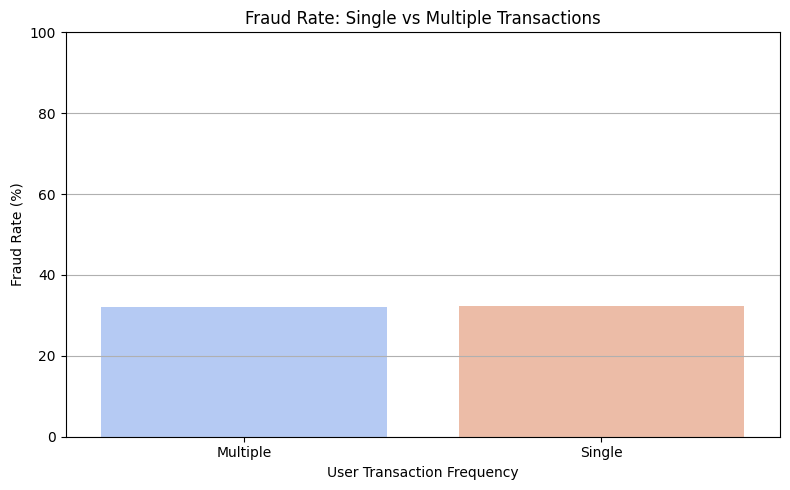

In [23]:
# Count transactions per user
user_txn_count = df['User_ID'].value_counts()

# Map back to original DataFrame
df['User_Txn_Freq'] = df['User_ID'].map(lambda x: 'Multiple' if user_txn_count[x] > 1 else 'Single')

txn_fraud_rate = df.groupby('User_Txn_Freq')['Fraud_Label'].value_counts(normalize=True).unstack().fillna(0)
txn_fraud_rate.columns = ['Non-Fraud Rate', 'Fraud Rate']
txn_fraud_rate['Fraud Rate (%)'] = (txn_fraud_rate['Fraud Rate'] * 100).round(2)

print(txn_fraud_rate)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=txn_fraud_rate.index, y=txn_fraud_rate['Fraud Rate (%)'], palette='coolwarm')

plt.title('Fraud Rate: Single vs Multiple Transactions')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('User Transaction Frequency')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


From this histogram graph and calculation, we can tell that multiple and single frequency of transaction share almost an identical amount, which are 32.13, and 32.31 percent.

*Relationship between having >1 transaction from a user vs Risk Score*

*Is account balance the same after a transaction?*

# **We have imbalance data, what's next?**

# **Correlation Matrix**

# **Z-Score**